In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [34]:
accuracy_avg = []
accuracy_std = []
f1_score_avg = []
f1_score_std = []
precision_avg = []
precision_std = []
recall_avg = []
recall_std = []

In [35]:
dir = "./logs"
files = os.listdir(dir)
for file in files:
    data = pd.read_csv(dir + "/" + file)
    accuracy_avg.append(np.mean(data["accuracy"].values))
    accuracy_std.append(np.std(data["accuracy"].values))

    f1_score_avg.append(np.mean(data["f1_score"].values))
    f1_score_std.append(np.std(data["f1_score"].values))
    
    precision_avg.append(np.mean(data["precision"].values))
    precision_std.append(np.std(data["precision"].values))
    
    recall_avg.append(np.mean(data["recall"].values))
    recall_std.append(np.std(data["recall"].values))
    

In [36]:
print(len(files), len(accuracy_avg), len(f1_score_avg), len(precision_avg), len(recall_avg))

134 134 134 134 134


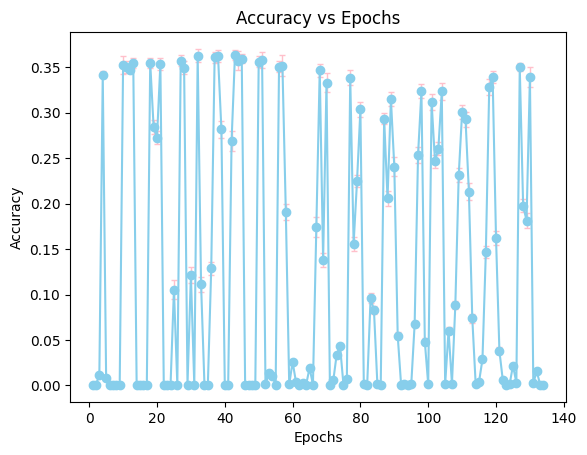

In [37]:
# plotting accuracy with respect to epochs with error bars
plt.figure()
plt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=2)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

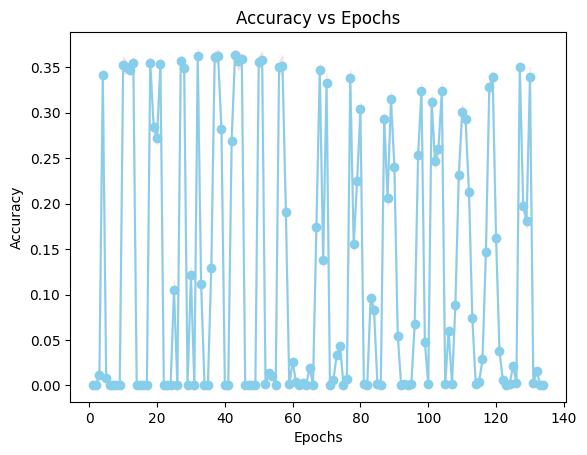

In [40]:
# plotting accuracy with respect to epochs with error fill
plt.figure()
plt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, '-o', color='skyblue')
plt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color='pink', alpha=0.4)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()